<a href="https://colab.research.google.com/github/vivien-DSA/Computer-Vision/blob/main/Computer_vision_EPITA_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Caracter Recognition

## Goal :
We will see how to learn to recognize optical characters with Keras.

It's all about recognizing hand-drawn numbers.

This type of application is deployed for the optical reading of bank checks, for example.

We are going to write a ** convolutional neural network ** to recognize handwritten characters.

It is a problem of ** multiple classification ** (10 digits from 0 to 9 => 10 classes)

### Note :
Learning the model is slow.
You can speed it up by deporting the calculations to ** GPU **.

## Importing the libraries

In [ ]:
# ==========================================
#                   MNIST dataset
# ==========================================

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl

## The dataset 

We import the images from [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

MNIST : Modified National Institute of Standards and Technology

It is a set of images of numbers in B&W.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("nb images = ",train_images.shape[0])
print("unique label = ",np.unique(train_labels))

nb images =  60000
unique label =  [0 1 2 3 4 5 6 7 8 9]


### Image format

In [ ]:
train_images.shape

(60000, 28, 28)

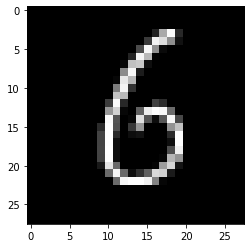

In [ ]:
num_img = 18
pl.figure()
pl.imshow(train_images[num_img], cmap = pl.get_cmap('gray'))
pl.show()

## Data preparation
We will successively:
* Resize images (resize)
* Then normalize them
* And finally categorize them (* one-hot-encoding *)




The images are in black and white. We add an additional dimension to take into account the color.

### Resize

The images must be "resized" in a standard analysis format.
This format is as follows:

```
[nb_images , hauteur , largeur , channel]
```


* We resize (* reshape *) to add ** a ** dimension, the *channel*.


```
channel = 1
```


If the images were in color, then we should take these ** three ** dimensions into account (RGB : red - green - blue).
In this case,

```
channel = 3
```

The code is :


```
train_images.reshape((nb_images, hauteur, largeur, channel))
```





In [ ]:
# Before modification
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
# After reshape 
train_images.shape

(60000, 28, 28, 1)

### Normalization of images
We normalize the original images which are encoded on 255 levels of gray.
The pixel values ​​will therefore be between 0 and 1


The standardization code:
```
train_images.astype('float32') / 255
```



In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### One hot encoding des labels 
Passage digit -> category

The outputs (labels) are a label (between 0 and 9) which represents the value of the plotted figure.
This is the exit that the network will have to learn to recognize.

* One Hot encoding * is a classic processing.
The corresponding French term is * codage disjonctif * (very little used).

It consists in extending the ** dimension ** of the output.
We go from a number between 0 and 9 to a vector (array) of dimension 9.


Example of One Hot Encoding on numbers between 0 and 2 (3 classes) : 

0 -> {1 , 0 , 0} 

1 -> {0 , 1 , 0} 

2 -> {0 , 0 , 1} 

This processing facilitates the learning of deep learning models.

It is imperative to know it.


In [ ]:
train_labels.shape

(60000,)

In [ ]:
# One Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
# Wich number ?
print(train_labels[num_img])
num_label = np.where(train_labels[num_img] != 0)
print("It's a : " , num_label)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
It's a :  (array([6]),)


## Deep learning : Convolutionnal Neural Network avec Keras

In [ ]:
model = models.Sequential()

# Convolution : 8 filters with 3 x 3 dimensions
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max pooling 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Convolution #2: 16 filters with 3 x 3 dimensions
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution #3
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

### *flatten* layer

After the ** convolution ** layers, we must ** always ** add a treatment layer **Flatten**.

This layer flattens the 2D structures resulting from the convolution.

The * Flatten * layer ensures the passage 2D -> 1D.


```
model.add(layers.Flatten())
```



In [ ]:
model.add(layers.Flatten())

### *Dense* layer

The flattening layer above allows you to make the transition to the *dense* layers that follow.


---
**Very important**

The role of the *dense* layer is to analyze the structures revealed by the convolution layers.
The convolutional layer highlights, extracts structures which are then processed by one - or more - * dense * layer.

---





In [ ]:
model.add(layers.Dense(256, activation='relu'))


### Decision layer

The *softmax* function is the decision function.

This function calculates a probability of belonging to one or other of the possible classes (10 digits <=> 10 classes).



```
model.add(layers.Dense(10, activation='softmax'))
```



Then, we choose a loss function, error function accordingly:
```
loss='categorical_crossentropy'
```





In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               37120     
__________

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, 
          train_labels, 
          validation_split = 0.1,
          epochs = 10, 
          batch_size = 500)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.6466 - acc: 0.8121 - val_loss: 0.2209 - val_acc: 0.9307
Epoch 2/10
54000/54000 [==============================] - 1s 28us/step - loss: 0.2188 - acc: 0.9316 - val_loss: 0.1327 - val_acc: 0.9582
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1397 - acc: 0.9560 - val_loss: 0.0996 - val_acc: 0.9705
Epoch 4/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1073 - acc: 0.9667 - val_loss: 0.0746 - val_acc: 0.9770
Epoch 5/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0857 - acc: 0.9725 - val_loss: 0.0607 - val_acc: 0.9825
Epoch 6/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0731 - acc: 0.9768 - val_loss: 0.0590 - val_acc: 0.9815
Epoch 7/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0617 - acc: 0.9807 - val_loss: 0.0718 - val_acc:

### Draw the learning curve

Did you think the learning went well ?

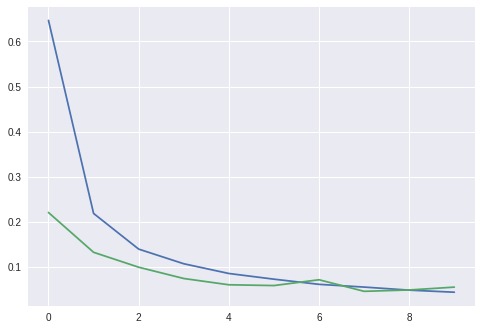

In [ ]:
pl.figure()
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])

## Performance du modèle 
Accuracy : % of well-classified instances.

In [ ]:
# Evaluation
print(model.evaluate(test_images, test_labels))

10000/10000 [==============================] - 1s 71us/step
[0.046412392889498735, 0.9858]


In [ ]:
6e4*0.0 # > 0.99996

900.0

### Exercice

Make changes in the network and compare your results to what we done


# Data augmentation


In [ ]:
#==========
# IMPORT DATA
#==========
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
# 
from keras.preprocessing.image import ImageDataGenerator
import  matplotlib.pyplot as pl

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 4 axis : samples,  width, height, channel 
train_images = train_images.reshape(train_images.shape[0], 28, 28 , 1)
train_images = train_images.astype('float32')

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

## Augmentation: implementation with Keras

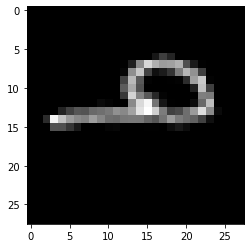

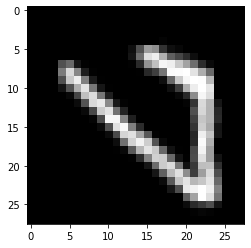

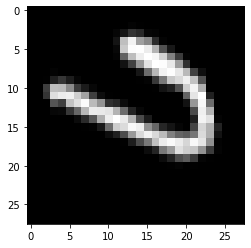

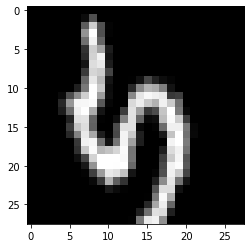

In [ ]:
# Data preparation
datagenerator = ImageDataGenerator(
                                   # Define data preparation / increase: rotation
                                   rotation_range = 90,
                                   zoom_range=0.2, 
                                   # Zoom random
                                   horizontal_flip = False,
                                   # Flip random
                                   vertical_flip = False,
                                   width_shift_range = 0.1,
                                   # Shift random horizontal 
                                   height_shift_range = 0.1)
 
# Data training
datagenerator.fit(train_images)
# Configure batch. run : UN batch 
bcl = 0

# Create the flow (a batch) after performing data augmentation :
for batch_x, batch_y in datagenerator.flow(train_images, train_labels, batch_size = 1):
    pl.figure()
    pl.imshow(batch_x[0].reshape(28, 28), 
              cmap = pl.get_cmap('gray'))
    bcl = bcl +1
    pl.show()
    if bcl > 3:
      # Interruption du batch 
      break


# Build a Convolutional Neural Network for Pizza Co.'s


## Your Task:



Worldwide Pizza Co.'s packaging is legendary. It's the only pizza company that has different shapes of boxes, depending on your order. A 5-piece wings meal comes in a star-shaped box; fries come in a circle-shaped box, and mozzarella sticks in a triangle one.

For now, the box-manufacturing company manually sorts the boxes. They saw that you were featured in a recent company newsletter about AI-solutions and have reached out for your help. They have some cameras on the production line and have sent you pictures of the boxes that they produce. Here are the four types:


* Stars
* Circles
* Squares
* Triangles


They said that they could install a system to automatically push boxes in the right direction if you could create a solution that can successfully detect them. Ready to work your magic ?

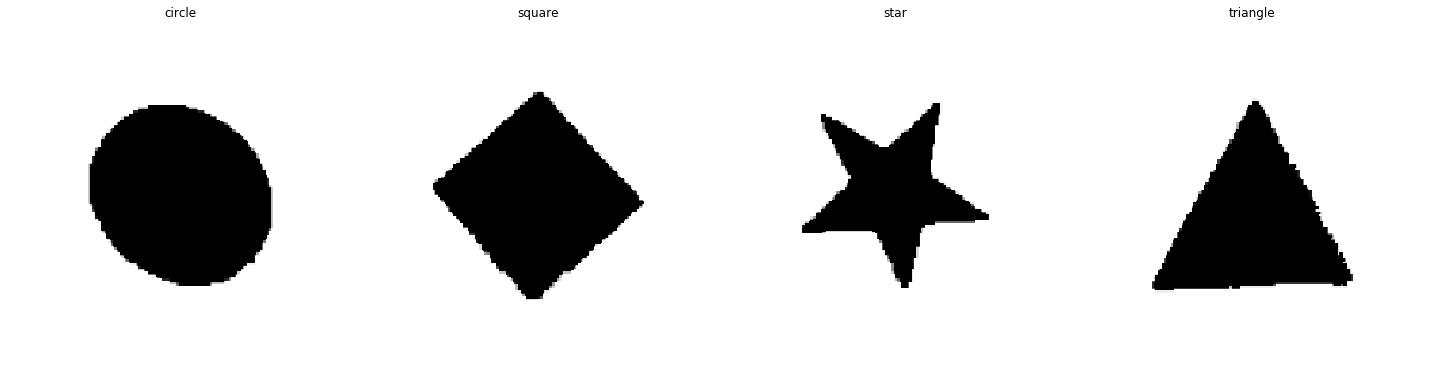

The data : https://github.com/Disruptive-Engineering-Limited/introduction-to-deep-learning/tree/master/datasets/recipes

## Goal :
We will see how to learn to recognize optical characters with Keras.

It's all about recognizing hand-drawn numbers.

This type of application is deployed for the optical reading of bank checks, for example.

We are going to write a ** convolutional neural network ** to recognize handwritten characters.

It is a problem of ** multiple classification ** (10 digits from 0 to 9 => 10 classes)

### Note :
Learning the model is slow.
You can speed it up by deporting the calculations to ** GPU **.

## Importing the libraries

In [ ]:
# ==========================================
#                   MNIST dataset
# ==========================================

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl

## The dataset 

We import the images from [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

MNIST : Modified National Institute of Standards and Technology

It is a set of images of numbers in B&W.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("nb images = ",train_images.shape[0])
print("unique label = ",np.unique(train_labels))

nb images =  60000
unique label =  [0 1 2 3 4 5 6 7 8 9]


### Image format

In [ ]:
train_images.shape

(60000, 28, 28)

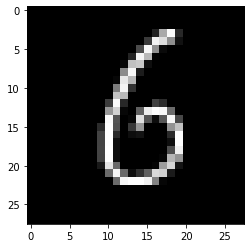

In [ ]:
num_img = 18
pl.figure()
pl.imshow(train_images[num_img], cmap = pl.get_cmap('gray'))
pl.show()

## Data preparation
We will successively:
* Resize images (resize)
* Then normalize them
* And finally categorize them (* one-hot-encoding *)




The images are in black and white. We add an additional dimension to take into account the color.

### Resize

The images must be "resized" in a standard analysis format.
This format is as follows:

```
[nb_images , hauteur , largeur , channel]
```


* We resize (* reshape *) to add ** a ** dimension, the *channel*.


```
channel = 1
```


If the images were in color, then we should take these ** three ** dimensions into account (RGB : red - green - blue).
In this case,

```
channel = 3
```

The code is :


```
train_images.reshape((nb_images, hauteur, largeur, channel))
```





In [ ]:
# Before modification
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
# After reshape 
train_images.shape

(60000, 28, 28, 1)

### Normalization of images
We normalize the original images which are encoded on 255 levels of gray.
The pixel values ​​will therefore be between 0 and 1


The standardization code:
```
train_images.astype('float32') / 255
```



In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### One hot encoding des labels 
Passage digit -> category

The outputs (labels) are a label (between 0 and 9) which represents the value of the plotted figure.
This is the exit that the network will have to learn to recognize.

* One Hot encoding * is a classic processing.
The corresponding French term is * codage disjonctif * (very little used).

It consists in extending the ** dimension ** of the output.
We go from a number between 0 and 9 to a vector (array) of dimension 9.


Example of One Hot Encoding on numbers between 0 and 2 (3 classes) : 

0 -> {1 , 0 , 0} 

1 -> {0 , 1 , 0} 

2 -> {0 , 0 , 1} 

This processing facilitates the learning of deep learning models.

It is imperative to know it.


In [ ]:
train_labels.shape

(60000,)

In [ ]:
# One Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
# Wich number ?
print(train_labels[num_img])
num_label = np.where(train_labels[num_img] != 0)
print("It's a : " , num_label)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
It's a :  (array([6]),)


## Deep learning : Convolutionnal Neural Network avec Keras

In [ ]:
model = models.Sequential()

# Convolution : 8 filters with 3 x 3 dimensions
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max pooling 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Convolution #2: 16 filters with 3 x 3 dimensions
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution #3
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

### *flatten* layer

After the ** convolution ** layers, we must ** always ** add a treatment layer **Flatten**.

This layer flattens the 2D structures resulting from the convolution.

The * Flatten * layer ensures the passage 2D -> 1D.


```
model.add(layers.Flatten())
```



In [ ]:
model.add(layers.Flatten())

### *Dense* layer

The flattening layer above allows you to make the transition to the *dense* layers that follow.


---
**Very important**

The role of the *dense* layer is to analyze the structures revealed by the convolution layers.
The convolutional layer highlights, extracts structures which are then processed by one - or more - * dense * layer.

---





In [ ]:
model.add(layers.Dense(256, activation='relu'))


### Decision layer

The *softmax* function is the decision function.

This function calculates a probability of belonging to one or other of the possible classes (10 digits <=> 10 classes).



```
model.add(layers.Dense(10, activation='softmax'))
```



Then, we choose a loss function, error function accordingly:
```
loss='categorical_crossentropy'
```





In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               37120     
__________

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, 
          train_labels, 
          validation_split = 0.1,
          epochs = 10, 
          batch_size = 500)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.6466 - acc: 0.8121 - val_loss: 0.2209 - val_acc: 0.9307
Epoch 2/10
54000/54000 [==============================] - 1s 28us/step - loss: 0.2188 - acc: 0.9316 - val_loss: 0.1327 - val_acc: 0.9582
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1397 - acc: 0.9560 - val_loss: 0.0996 - val_acc: 0.9705
Epoch 4/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1073 - acc: 0.9667 - val_loss: 0.0746 - val_acc: 0.9770
Epoch 5/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0857 - acc: 0.9725 - val_loss: 0.0607 - val_acc: 0.9825
Epoch 6/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0731 - acc: 0.9768 - val_loss: 0.0590 - val_acc: 0.9815
Epoch 7/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.0617 - acc: 0.9807 - val_loss: 0.0718 - val_acc:

### Draw the learning curve

Did you think the learning went well ?

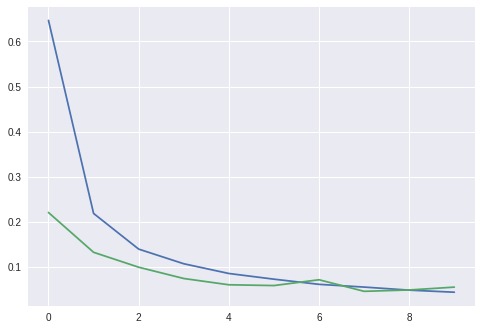

In [ ]:
pl.figure()
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])

## Performance du modèle 
Accuracy : % of well-classified instances.

In [ ]:
# Evaluation
print(model.evaluate(test_images, test_labels))

10000/10000 [==============================] - 1s 71us/step
[0.046412392889498735, 0.9858]


In [ ]:
6e4*0.0 # > 0.99996

900.0

### Exercice

Make changes in the network and compare your results to what we done


# Data augmentation


In [ ]:
#==========
# IMPORT DATA
#==========
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
# 
from keras.preprocessing.image import ImageDataGenerator
import  matplotlib.pyplot as pl

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 4 axis : samples,  width, height, channel 
train_images = train_images.reshape(train_images.shape[0], 28, 28 , 1)
train_images = train_images.astype('float32')

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

## Augmentation: implementation with Keras

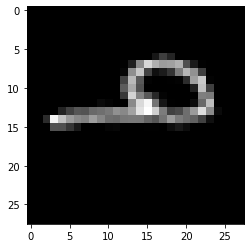

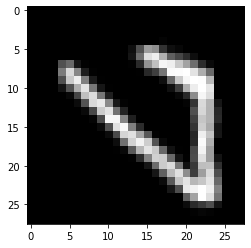

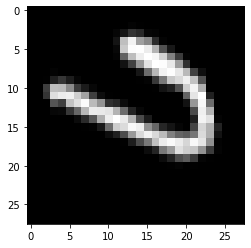

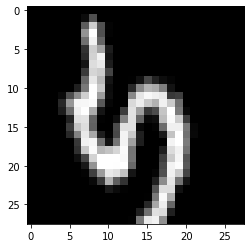

In [ ]:
# Data preparation
datagenerator = ImageDataGenerator(
                                   # Define data preparation / increase: rotation
                                   rotation_range = 90,
                                   zoom_range=0.2, 
                                   # Zoom random
                                   horizontal_flip = False,
                                   # Flip random
                                   vertical_flip = False,
                                   width_shift_range = 0.1,
                                   # Shift random horizontal 
                                   height_shift_range = 0.1)
 
# Data training
datagenerator.fit(train_images)
# Configure batch. run : UN batch 
bcl = 0

# Create the flow (a batch) after performing data augmentation :
for batch_x, batch_y in datagenerator.flow(train_images, train_labels, batch_size = 1):
    pl.figure()
    pl.imshow(batch_x[0].reshape(28, 28), 
              cmap = pl.get_cmap('gray'))
    bcl = bcl +1
    pl.show()
    if bcl > 3:
      # Interruption du batch 
      break
